In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(f"data/penguins.csv")

In [4]:
data = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "species"]].dropna().values
species = data[:, -1]
species = pd.Series(species).astype("category").cat.codes
data = data[:, :-1].astype(np.float32)


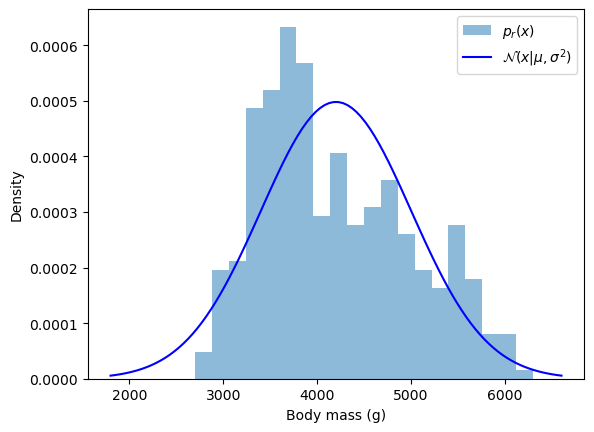

In [ ]:
# Gaussian model
from scipy.stats import norm

fig = plt.figure(figsize=(6.4, 4.8), dpi=100)
ax = plt.axes()

ax.hist(data[:, 3], bins=20, density=True, alpha=0.5, label=r"$p_r(x)$")
mean = np.mean(data, axis=0)[3]
std = np.std(data, axis=0)[3]
norm = norm(loc=mean, scale=std)
x = np.linspace(mean - 3*std, mean + 3*std, 100)
ax.plot(x, norm.pdf(x), "b", label=r"$\mathcal{N}(x | \mu, \sigma^2)$")

ax.legend()
ax.set_xlabel("Body mass (g)")
ax.set_ylabel("Density")

plt.savefig(f"body_mass_histogram.png")
plt.show()

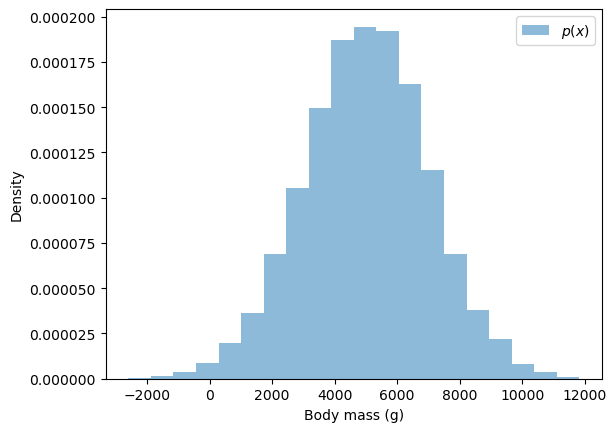

In [7]:
# Prior predictive samples
from scipy.stats import norm, uniform
p_mu = norm(loc=5000, scale=2000)
p_sigma2 = uniform(loc=0, scale=100)

N = 10000
mu_samples = p_mu.rvs(size=N)
sigma2_samples = p_sigma2.rvs(size=N)
x = norm(loc=mu_samples, scale=sigma2_samples**0.5).rvs()

fig = plt.figure(figsize=(6.4, 4.8), dpi=100)
ax = plt.axes()
ax.hist(x, bins=20, density=True, alpha=0.5, label=r"$p(x)$")
ax.legend()
ax.set_xlabel("Body mass (g)")
ax.set_ylabel("Density")

plt.savefig(f"prior_predictive_samples.png")
plt.show()